In [4]:
import pandas as pd

## Удалить дублирующиеся строки (если в вашем наборе данных их нет, показать их отсутствие).

In [5]:
data=pd.read_csv('ford.csv',sep=',')
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [59]:
data.shape

(17966, 9)

In [60]:
data=data.drop_duplicates().reset_index(drop=True)

In [61]:
data.shape

(17812, 9)

## Определить переменные с пропущенными значениями и обработать пропуски (если таких нет, также показать их отсутствие).

In [6]:
data.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

## Построить профиль данных, указать на важные аспекты (сильную корреляцию и т.д.)

In [7]:
!pip install pandas_profiling --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from pandas_profiling import ProfileReport

In [9]:
profile = ProfileReport(data, title='test')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
data = data.drop(data[data.year > 2020].index)

## Построить визуализации (не менее 3, исходя из данных)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%config InlineBackend.figure_format = 'retina'

In [6]:
data1 = data.pivot(columns="price", values="year")
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


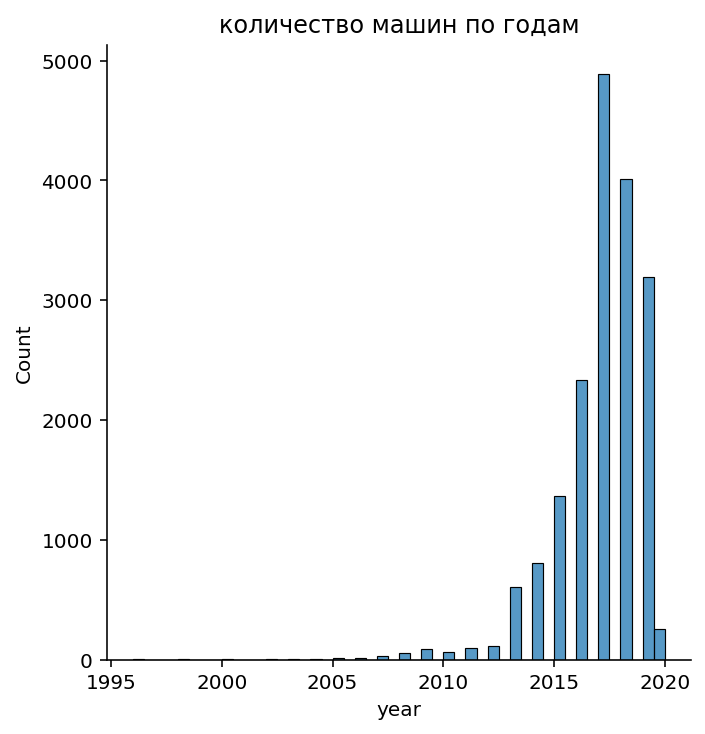

In [40]:
sns.displot(data,x="year",binwidth=0.5,).set(title='количество машин по годам')

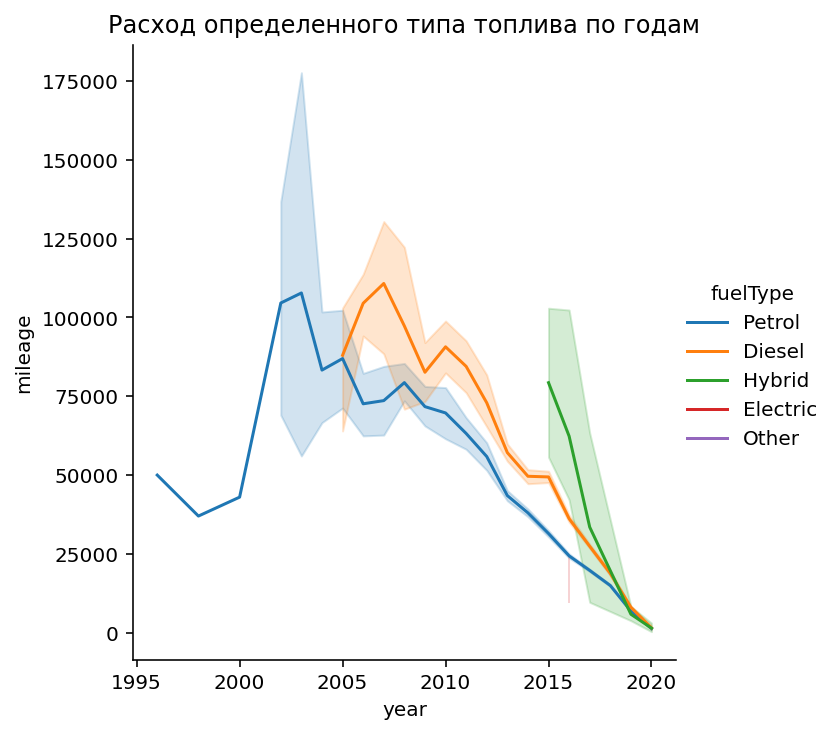

In [48]:
sns.relplot(data=data, x="year", y="mileage", hue="fuelType", kind="line").set(title='Расход определенного типа топлива по годам')

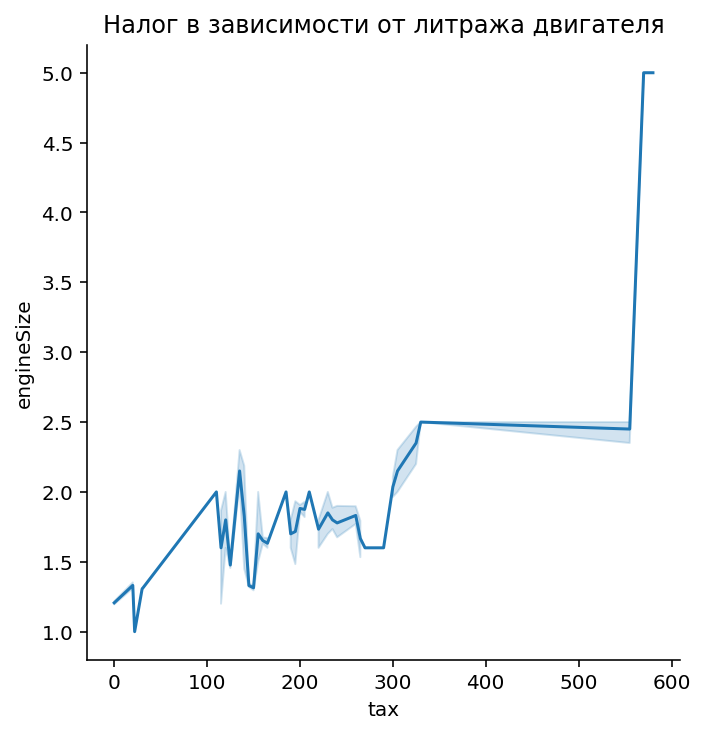

In [63]:
sns.relplot(data=data,x='tax',y='engineSize',kind="line").set(title='Налог в зависимости от литража двигателя')

## Feature Engineering

### Уменьшение размерности

In [10]:
import numpy as np

import sklearn
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
data.head(1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0


In [12]:
X = data[['year','price','mileage','tax','mpg','engineSize']]
y = data.iloc[:, -1]
y=y.astype('int')

In [13]:
bestfeatures = SelectKBest(score_func = chi2, k = 'all')
fit = bestfeatures.fit(X, y)

In [14]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [15]:
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(5, 'Score'))

        Specs         Score
1       price  8.168248e+06
2     mileage  5.596187e+06
3         tax  3.189072e+04
4         mpg  2.960013e+03
5  engineSize  1.881266e+03


In [16]:
features = ['year','tax','mileage']
x = data.loc[:, features].values

### Стандартизация

In [17]:
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

,year,tax,mileage
0,0.067059,0.591380,-0.382994
1,0.554393,0.591380,-0.736317
2,0.067059,0.591380,-0.562616
3,1.041726,0.510777,-0.665405
4,1.041726,0.510777,-1.127749


In [18]:
pca = PCA(n_components = 1)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1'])

principalDf.head()

,principal component 1
0,0.529383
1,1.073245
2,0.644536
3,1.312400
4,1.608801


### Нормализация

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
data.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [21]:
numerics = ['int64', 'float64']

newdf = data.select_dtypes(include = numerics)

In [22]:
scaler = MinMaxScaler()

scaler.fit(newdf)
scaled_features = scaler.transform(newdf)

df_MinMax = pd.DataFrame(data = scaled_features, 
columns = ["year", 
          "price",
          "mileage",
          "tax",
          "mpg",
          "engineSize"])

df_MinMax.head()

,year,price,mileage,tax,mpg,engineSize
0,0.328125,0.211101,0.089747,0.258621,0.203867,0.2
1,0.343750,0.247798,0.051125,0.258621,0.203867,0.2
2,0.328125,0.229450,0.070113,0.258621,0.203867,0.2
3,0.359375,0.312018,0.058877,0.250000,0.107735,0.3
4,0.359375,0.293670,0.008337,0.250000,0.154144,0.2


### Биннинг

In [23]:
import seaborn as sns

sns.set_style('whitegrid')

In [24]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [25]:
df = data.groupby(['model', 'year'])['price'].sum().reset_index()
df.head()

,model,year,price
0,B-MAX,2012,33393
1,B-MAX,2013,324296
2,B-MAX,2014,366349
3,B-MAX,2015,301096
4,B-MAX,2016,546080


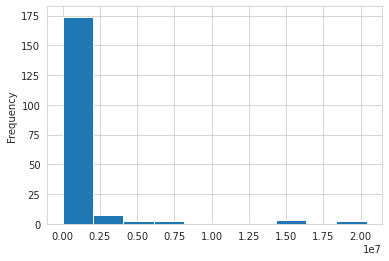

In [26]:
df['price'].plot(kind='hist');

#### qcut

In [27]:
pd.qcut(df['price'], q=4)

0       (14999.0, 104833.0]
1      (104833.0, 770052.0]
2      (104833.0, 770052.0]
3      (104833.0, 770052.0]
4      (104833.0, 770052.0]
               ...         
188    (104833.0, 770052.0]
189    (104833.0, 770052.0]
190    (104833.0, 770052.0]
191      (894.999, 14999.0]
192      (894.999, 14999.0]
Name: price, Length: 193, dtype: category
Categories (4, interval[float64, right]): [(894.999, 14999.0] < (14999.0, 104833.0] <
                                           (104833.0, 770052.0] < (770052.0, 20412218.0]]

In [28]:
df['quantile_ex_1'] = pd.qcut(df['price'], q=4)
df['quantile_ex_2'] = pd.qcut(df['price'], q=10, precision=0)

df.head()

,model,year,price,quantile_ex_1,quantile_ex_2
0,B-MAX,2012,33393,"(14999.0, 104833.0]","(23777.0, 43455.0]"
1,B-MAX,2013,324296,"(104833.0, 770052.0]","(223314.0, 479951.0]"
2,B-MAX,2014,366349,"(104833.0, 770052.0]","(223314.0, 479951.0]"
3,B-MAX,2015,301096,"(104833.0, 770052.0]","(223314.0, 479951.0]"
4,B-MAX,2016,546080,"(104833.0, 770052.0]","(479951.0, 1078641.0]"


In [29]:
df['quantile_ex_1'].value_counts()

(894.999, 14999.0]        49
(14999.0, 104833.0]       48
(104833.0, 770052.0]      48
(770052.0, 20412218.0]    48
Name: quantile_ex_1, dtype: int64

In [30]:
df['quantile_ex_3'] = pd.qcut(df['price'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=False,
                              precision=0)
df.head()

,model,year,price,quantile_ex_1,quantile_ex_2,quantile_ex_3
0,B-MAX,2012,33393,"(14999.0, 104833.0]","(23777.0, 43455.0]",1
1,B-MAX,2013,324296,"(104833.0, 770052.0]","(223314.0, 479951.0]",3
2,B-MAX,2014,366349,"(104833.0, 770052.0]","(223314.0, 479951.0]",3
3,B-MAX,2015,301096,"(104833.0, 770052.0]","(223314.0, 479951.0]",3
4,B-MAX,2016,546080,"(104833.0, 770052.0]","(479951.0, 1078641.0]",3


#### cut

In [31]:
df = df.drop(columns = ['quantile_ex_1','quantile_ex_2','quantile_ex_3'])
df.head()

,model,year,price
0,B-MAX,2012,33393
1,B-MAX,2013,324296
2,B-MAX,2014,366349
3,B-MAX,2015,301096
4,B-MAX,2016,546080


In [32]:
pd.cut(df['price'], bins=4)

0      (-19516.323, 5103725.75]
1      (-19516.323, 5103725.75]
2      (-19516.323, 5103725.75]
3      (-19516.323, 5103725.75]
4      (-19516.323, 5103725.75]
                 ...           
188    (-19516.323, 5103725.75]
189    (-19516.323, 5103725.75]
190    (-19516.323, 5103725.75]
191    (-19516.323, 5103725.75]
192    (-19516.323, 5103725.75]
Name: price, Length: 193, dtype: category
Categories (4, interval[float64, right]): [(-19516.323, 5103725.75] < (5103725.75, 10206556.5] <
                                           (10206556.5, 15309387.25] < (15309387.25, 20412218.0]]

In [33]:
pd.cut(df['price'], bins=4).value_counts()

(-19516.323, 5103725.75]     182
(10206556.5, 15309387.25]      5
(5103725.75, 10206556.5]       4
(15309387.25, 20412218.0]      2
Name: price, dtype: int64

In [34]:
cut_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
cut_bins = [0, 300000, 350000, 400000, 600000]

df['cut_ex1'] = pd.cut(df['price'],
                       bins=cut_bins,
                       labels=cut_labels_4)
df.head()

,model,year,price,cut_ex1
0,B-MAX,2012,33393,silver
1,B-MAX,2013,324296,gold
2,B-MAX,2014,366349,platinum
3,B-MAX,2015,301096,gold
4,B-MAX,2016,546080,diamond


### Энкодинг

In [35]:
data.shape
data.head(1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0


In [36]:
data = data.drop(columns=['year','price','mileage','fuelType','tax','mpg','engineSize'])
data.head()

,model,transmission
0,Fiesta,Automatic
1,Focus,Manual
2,Focus,Manual
3,Fiesta,Manual
4,Fiesta,Automatic


In [37]:
s = pd.Series(data.model)
pd.get_dummies(s)

,B-MAX,C-MAX,EcoSport,Edge,Escort,Fiesta,Focus,Fusion,Galaxy,Grand C-MAX,...,Mondeo,Mustang,Puma,Ranger,S-MAX,Streetka,Tourneo Connect,Tourneo Custom,Transit Tourneo,Focus
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17807,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17808,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17809,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Расчет новых фич из исходных

In [38]:
pip install featuretools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
import featuretools as ft

/usr/local/lib/python3.7/dist-packages/woodwork/__init__.py:23: FutureWarning: Woodwork may not support Python 3.7 in next non-bugfix release.
  "Woodwork may not support Python 3.7 in next non-bugfix release.", FutureWarning
/usr/local/lib/python3.7/dist-packages/featuretools/__init__.py:67: FutureWarning: Featuretools may not support Python 3.7 in next non-bugfix release.
  FutureWarning,


In [41]:
data = ft.demo.load_mock_customer()

In [42]:
customers_df = data["customers"]
customers_df

,customer_id,zip_code,join_date,birthday
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


In [43]:
sessions_df = data["sessions"]
sessions_df.sample(5)

,session_id,customer_id,device,session_start
13,14,1,tablet,2014-01-01 03:28:00
6,7,3,tablet,2014-01-01 01:39:40
1,2,5,mobile,2014-01-01 00:17:20
28,29,1,mobile,2014-01-01 07:10:05
24,25,3,desktop,2014-01-01 05:59:40


In [44]:
transactions_df = data["transactions"]
transactions_df.sample(5)

,transaction_id,session_id,transaction_time,product_id,amount
74,232,5,2014-01-01 01:20:10,1,139.20
231,27,17,2014-01-01 04:10:15,2,90.79
434,36,31,2014-01-01 07:50:10,3,62.35
420,56,30,2014-01-01 07:35:00,3,72.70
54,444,4,2014-01-01 00:58:30,4,43.59


In [45]:
dataframes = {
    "customers": (customers_df, "customer_id"),
    "sessions": (sessions_df, "session_id", "session_start"),
    "transactions": (transactions_df, "transaction_id", "transaction_time"),
}

In [46]:
relationships = [
    ("sessions", "session_id", "transactions", "session_id"),
    ("customers", "customer_id", "sessions", "customer_id"),
]

In [47]:
feature_matrix_customers, features_defs = ft.dfs(
    dataframes=dataframes,
    relationships=relationships,
    target_dataframe_name="customers",
)
feature_matrix_customers

,COUNT(sessions),MODE(sessions.device),NUM_UNIQUE(sessions.device),COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),SKEW(transactions.amount),...,STD(sessions.SKEW(transactions.amount)),STD(sessions.SUM(transactions.amount)),SUM(sessions.MAX(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),SUM(sessions.MIN(transactions.amount)),SUM(sessions.NUM_UNIQUE(transactions.product_id)),SUM(sessions.SKEW(transactions.amount)),SUM(sessions.STD(transactions.amount)),MODE(transactions.sessions.device),NUM_UNIQUE(transactions.sessions.device)
customer_id,,,,,,,,,,,,,,,,,,,,,
1,8,mobile,3,126,139.43,71.631905,5.81,4,5,0.019698,...,0.589386,279.510713,1057.97,582.193117,78.59,40.0,-0.476122,312.745952,mobile,3
2,7,desktop,3,93,146.81,77.422366,8.73,4,5,0.098259,...,0.509798,251.609234,931.63,548.905851,154.60,35.0,-0.277640,258.700528,desktop,3
3,6,desktop,3,93,149.15,67.060430,5.89,1,5,0.418230,...,0.429374,219.021420,847.63,405.237462,66.21,29.0,2.286086,257.299895,desktop,3
4,8,mobile,3,109,149.95,80.070459,5.73,2,5,-0.036348,...,0.387884,235.992478,1157.99,649.657515,131.51,37.0,0.002764,356.125829,mobile,3
5,6,mobile,3,79,149.02,80.375443,7.55,5,5,-0.025941,...,0.415426,402.775486,839.76,472.231119,86.49,30.0,0.014384,259.873954,mobile,3
